In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import random
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
tot_lat_range = (-90, 90)
tot_lng_range = (-180, 180)

In [79]:
# test
x = "New York"
url = "http://api.openweathermap.org/data/2.5/weather?"
tryit = requests.get(url + "appid="+ api_key + "&q=" + x+"&units=imperial").json()
print(tryit)


{'coord': {'lon': -73.99, 'lat': 40.73}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 40.17, 'pressure': 1021, 'humidity': 41, 'temp_min': 37, 'temp_max': 43}, 'visibility': 16093, 'wind': {'speed': 12.75, 'deg': 360}, 'clouds': {'all': 1}, 'dt': 1575056721, 'sys': {'type': 1, 'id': 4686, 'country': 'US', 'sunrise': 1575028714, 'sunset': 1575063015}, 'timezone': -18000, 'id': 5128581, 'name': 'New York', 'cod': 200}


In [82]:
# List for holding lat_lngs & cities by quarter

# NW
lat_lngs_q1 = []
cities_q1 = []
# NE
lat_lngs_q2 = []
cities_q2 = []
# SW
lat_lngs_q3 = []
cities_q3 = []
# SE
lat_lngs_q4 = []
cities_q4 = []

# Create a set of random lat and lng combinations
lats1 = np.random.uniform(low=00.000, high=90.000, size=400)
lngs1 = np.random.uniform(low=-180.000, high=00.000, size=400)

lats2 = np.random.uniform(low=00.000, high=90.000, size=400)
lngs2 = np.random.uniform(low=-00.000, high=180.000, size=400)

lats3 = np.random.uniform(low=-90.000, high=00.000, size=500)
lngs3 = np.random.uniform(low=-180.000, high=00.000, size=500)

lats4 = np.random.uniform(low=-90.000, high=00.000, size=400)
lngs4 = np.random.uniform(low=-0.000, high=180.000, size=400)

lat_lngs_q1 = zip(lats1, lngs1)
lat_lngs_q2 = zip(lats2, lngs2)
lat_lngs_q3 = zip(lats3, lngs3)
lat_lngs_q4 = zip(lats4, lngs4)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs_q1:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities_q1:
        cities_q1.append(city)
        
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs_q2:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities_q2:
        cities_q2.append(city)
        
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs_q3:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities_q3:
        cities_q3.append(city)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs_q4:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities_q4:
        cities_q4.append(city)

# Print the city count to confirm sufficient count
print("Total Cities")
print(len(cities_q1))
print(len(cities_q2))
print(len(cities_q3))
print(len(cities_q4))

Total Cities
178
265
98
136


In [83]:
total_cities = (cities_q1 + cities_q2 + cities_q3 + cities_q4)
len(total_cities)

677

In [84]:
# Build query, create loop
#query_url = url + "appid="+ api_key + "&q=" + x
#response = requests.get(query_url)
#response_json = response.json()

print("Begin to record city weather data.")
print("--- --- --- --- --- --- --- --- --- ---")

url = "http://api.openweathermap.org/data/2.5/weather?"
#weather_data = []
city_name = []
country = []
lat = []
lon = []
temp = []
humidity = []
wind_speed = []
cloudiness = []
record = 1

for city in total_cities:    
    try:
        query_url = url + "appid="+ api_key + "&q=" + city +"&units=imperial"

        # Query city
        weather_response = requests.get(query_url).json()

        # Store data 
       # weather_data.append(weather_response)
        city_name.append(weather_response["name"])
        country.append(weather_response["sys"]["country"])
        lat.append(weather_response["coord"]["lat"])
        lon.append(weather_response["coord"]["lon"])
        temp.append(weather_response["main"]["temp"])
        humidity.append(weather_response["main"]["humidity"])
        wind_speed.append(weather_response["wind"]["speed"])
        cloudiness.append(weather_response["clouds"]["all"])
        
        # Print Query City
        print("Processing data for Record "+str(record)+": "+ city)
        
        # Add number counter
        record += 1
        # Slow it down for api rate
        time.sleep(.5)

    # If no data, try next city
    except:
        print("Data not found. Skipping...")
print("--- --- --- --- --- --- --- --- --- ---")
print("End.")

Begin to record city weather data.
--- --- --- --- --- --- --- --- --- ---
Processing data for Record 1: kenitra
Processing data for Record 2: vestmannaeyjar
Processing data for Record 3: kapaa
Processing data for Record 4: egvekinot
Processing data for Record 5: yellowknife
Processing data for Record 6: port hardy
Processing data for Record 7: nome
Processing data for Record 8: ketchikan
Processing data for Record 9: provideniya
Processing data for Record 10: upernavik
Processing data for Record 11: swift current
City not found. Skipping...
Processing data for Record 12: paracuru
City not found. Skipping...
Processing data for Record 13: makakilo city
Processing data for Record 14: norman wells
City not found. Skipping...
Processing data for Record 15: qaanaaq
City not found. Skipping...
Processing data for Record 16: carutapera
Processing data for Record 17: marienburg
Processing data for Record 18: dingle
Processing data for Record 19: kahului
City not found. Skipping...
Processing 

Processing data for Record 188: krasnogvardeyskoye
Processing data for Record 189: khatanga
Processing data for Record 190: solnechnyy
Processing data for Record 191: vardo
Processing data for Record 192: zhigansk
Processing data for Record 193: abu kamal
City not found. Skipping...
Processing data for Record 194: katsuura
Processing data for Record 195: redkino
Processing data for Record 196: gat
City not found. Skipping...
Processing data for Record 197: marzuq
Processing data for Record 198: mobaye
Processing data for Record 199: sur
Processing data for Record 200: port blair
Processing data for Record 201: talnakh
City not found. Skipping...
Processing data for Record 202: belaya gora
Processing data for Record 203: smidovich
Processing data for Record 204: zhezkazgan
Processing data for Record 205: leningradskiy
Processing data for Record 206: sarkand
Processing data for Record 207: gushikawa
Processing data for Record 208: amazar
Processing data for Record 209: hobyo
Processing d

Processing data for Record 375: aswan
Processing data for Record 376: verkh-usugli
City not found. Skipping...
Processing data for Record 377: kommunisticheskiy
Processing data for Record 378: hambantota
Processing data for Record 379: ahmadpur
City not found. Skipping...
City not found. Skipping...
Processing data for Record 380: manado
Processing data for Record 381: norilsk
City not found. Skipping...
Processing data for Record 382: yumen
Processing data for Record 383: gubkinskiy
Processing data for Record 384: lasa
Processing data for Record 385: abonnema
Processing data for Record 386: dandong
Processing data for Record 387: eyl
Processing data for Record 388: agadez
Processing data for Record 389: koboko
Processing data for Record 390: lillesand
Processing data for Record 391: jumla
Processing data for Record 392: kodinsk
Processing data for Record 393: mezen
City not found. Skipping...
Processing data for Record 394: balkhash
Processing data for Record 395: belyy yar
Processing

Processing data for Record 563: amahai
Processing data for Record 564: manokwari
City not found. Skipping...
Processing data for Record 565: kununurra
Processing data for Record 566: kibondo
Processing data for Record 567: yulara
Processing data for Record 568: grand gaube
Processing data for Record 569: khorixas
City not found. Skipping...
Processing data for Record 570: saint-joseph
Processing data for Record 571: kingaroy
Processing data for Record 572: quatre cocos
Processing data for Record 573: meulaboh
Processing data for Record 574: clyde
Processing data for Record 575: batemans bay
Processing data for Record 576: chadiza
Processing data for Record 577: kaitangata
Processing data for Record 578: roma
Processing data for Record 579: cap malheureux
Processing data for Record 580: dunedin
Processing data for Record 581: outjo
Processing data for Record 582: portland
Processing data for Record 583: rundu
Processing data for Record 584: mitsamiouli
City not found. Skipping...
Proces

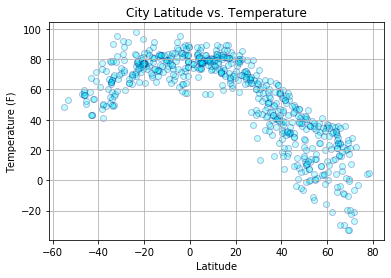

In [119]:
temp_VS_lat = pd.DataFrame({"lat":lat, "temp": temp})
plt.scatter(temp_VS_lat["lat"], temp_VS_lat["temp"], marker="o", c="aqua", edgecolors= "navy", alpha=.25)

plt.title("City Latitude vs. Temperature")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Latitude_vs_Temp.png")
plt.show()


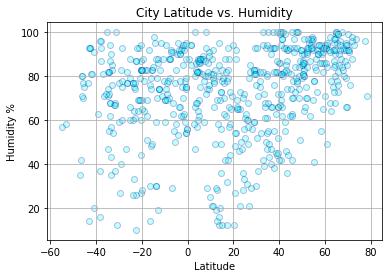

In [120]:
hum_VS_lat = pd.DataFrame({"lat":lat, "hum": humidity})
plt.scatter(hum_VS_lat["lat"], hum_VS_lat["hum"], marker="o", c="aqua", edgecolors= "navy", alpha=.25)

plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity %")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Latitude_vs_Humidity.png")
plt.show()

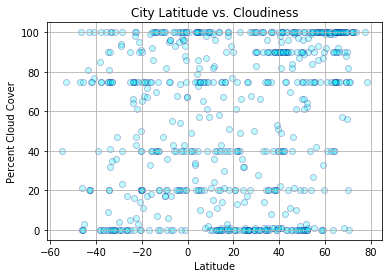

In [121]:
cloud_VS_lat = pd.DataFrame({"lat":lat, "clou": cloudiness})
plt.scatter(cloud_VS_lat["lat"], cloud_VS_lat["clou"], marker="o", c="aqua", edgecolors= "navy", alpha=.25)

plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Percent Cloud Cover")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Latitude_vs_Cloudiness.png")
plt.show()

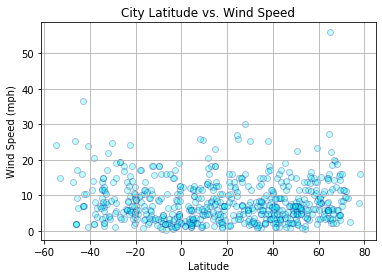

In [122]:
wind_VS_lat = pd.DataFrame({"lat":lat, "wind": wind_speed})
plt.scatter(wind_VS_lat["lat"], wind_VS_lat["wind"], marker="o", c="aqua", edgecolors= "navy", alpha=.25)

plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Latitude_vs_Wind_Speed.png")
plt.show()

In [125]:
global_weather_conditions_df = pd.DataFrame({
    "City Name": city_name,
    "Country": country,
    "Latitude": lat,
    "Longitude": lon,
    "Temperature (K)": temp,
    "Humidity (%)": humidity,
    "Cloud Cover (%)": cloudiness,
    "Wind Speed (mph)": wind_speed
})
global_weather_conditions_df

,City Name,Country,Latitude,Longitude,Temperature (K),Humidity (%),Cloud Cover (%),Wind Speed (mph)
0,Kenitra,MA,34.26,-6.57,58.35,93,40,5.82
1,Vestmannaeyjar,IS,63.44,-20.27,35.29,75,0,7.87
2,Kapaa,US,22.08,-159.32,78.57,65,40,16.11
3,Egvekinot,RU,66.32,-179.17,6.39,90,100,6.17
4,Yellowknife,CA,62.45,-114.38,13.59,78,75,5.82
...,...,...,...,...,...,...,...,...
612,Alice Springs,AU,-23.70,133.88,82.40,26,64,11.41
613,Esperance,AU,-33.86,121.89,53.60,62,90,11.41
614,Galesong,ID,-5.32,119.37,73.40,83,20,3.36
615,Sola,TZ,-3.17,33.80,63.32,90,54,3.42


In [127]:
global_weather_conditions_df.to_csv("global_weather_conditions_df.csv")